<a href="https://colab.research.google.com/github/PatrickRuan/ML100Days/blob/master/homework/Day_005_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Day_005-1_HW.ipynb

# [作業目標]
- 利用範例的創建方式, 創建一組資料, 並練習如何取出最大值

# [作業重點]
- 練習創立 DataFrame (In[2])
- 如何取出口數最多的國家 (In[3], Out[3])

## 練習時間
在小量的資料上，我們用眼睛就可以看得出來程式碼是否有跑出我們理想中的結果

請嘗試想像一個你需要的資料結構 (裡面的值可以是隨機的)，然後用上述的方法把它變成 pandas DataFrame

#### Ex: 想像一個 dataframe 有兩個欄位，一個是國家，一個是人口，求人口數最多的國家

### Hints: [隨機產生數值](https://blog.csdn.net/christianashannon/article/details/78867204)

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = {'國家':['us', 'ca', 'uk', 'ind','sig', 'jp', 'ko'] ,
        '人口':[np.random.randint(100000,1000000) for data in range(7)]}
data = pd.DataFrame(data)

In [ ]:
data

,國家,人口
0,us,397623
1,ca,425745
2,uk,559557
3,ind,193700
4,sig,876894
5,jp,725923
6,ko,879041


# Day_005-2_HW.ipynb

## 讀取 txt 檔
* 請讀取 [text file](https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt)
* 懶人複製連結: https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt

### Hints: 使用 [Request](https://blog.gtwang.org/programming/python-requests-module-tutorial/) 抓取資料
### Hints: [字串分割](http://www.runoob.com/python/att-string-split.html)
### Hints: 例外處理: [Try-Except](https://pydoing.blogspot.com/2011/01/python-try.html)

In [ ]:
import requests
text = requests.get("https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt")
# !curl -O
doc = text.text
len(doc) #784594
doc = doc.split('\n')
type(doc) #list
doc[0:3]
for n, text in enumerate(doc):
  doc[n]=text.split('\t')
doc[0:3]
import pandas as pd
df = pd.DataFrame(doc)
df.columns = ['no.', 'url']
df.head()

,no.,url
0,n00015388_157,http://farm1.static.flickr.com/145/430300483_2...
1,n00015388_238,http://farm2.static.flickr.com/1005/3352960681...
2,n00015388_304,http://farm1.static.flickr.com/27/51009336_a96...
3,n00015388_327,http://farm4.static.flickr.com/3025/2444687979...
4,n00015388_355,http://img100.imageshack.us/img100/3253/forres...


# [作業目標]
- 試著讀取網頁上的圖片連結清單, 再以清單中網址讀取圖片

# [作業重點]
- 從網頁上讀取連結清單 (In[1], In[2])
- 從清單網址讀取圖片 (In[6]~In[9], Out[6]~Out[9])

In [ ]:
## 假如我們不想把資料載到自己的電腦裡?
# 把連結填入
target_url = "https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt"
!curl -O https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  766k  100  766k    0     0  2651k      0 --:--:-- --:--:-- --:--:-- 2642k


In [ ]:
import requests
response = requests.get(target_url)
data = response.text

# 用 request 傳送回來的資料不會認得斷行符號
print(len(data))
data[0:100]

784594


'n00015388_157\thttp://farm1.static.flickr.com/145/430300483_21e993670c.jpg\nn00015388_238\thttp://farm2'

In [ ]:
# 找到換行符號，用該符號做字串分割後，把它拿掉
split_tag = '\n'

data = data.split(split_tag)
print(len(data))
data[0]

9996


'n00015388_157\thttp://farm1.static.flickr.com/145/430300483_21e993670c.jpg'

## 將 txt 轉成 pandas dataframe

In [ ]:
import pandas as pd
arrange_data = []
for i in data:
  arrange_data.append(i.split('\t'))
  
    
df = pd.DataFrame(arrange_data)
df.head()

,0,1
0,n00015388_157,http://farm1.static.flickr.com/145/430300483_2...
1,n00015388_238,http://farm2.static.flickr.com/1005/3352960681...
2,n00015388_304,http://farm1.static.flickr.com/27/51009336_a96...
3,n00015388_327,http://farm4.static.flickr.com/3025/2444687979...
4,n00015388_355,http://img100.imageshack.us/img100/3253/forres...


## 讀取圖片，請讀取上面 data frame 中的前 5 張圖片

In [ ]:
first_link = df.loc[0,1]
first_link

'http://farm1.static.flickr.com/145/430300483_21e993670c.jpg'

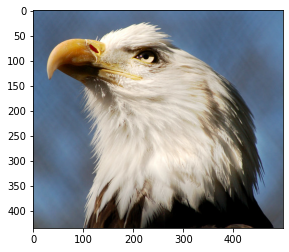

In [ ]:
from PIL import Image
from io import BytesIO
import numpy as np
import matplotlib.pyplot as plt

# 請用 df.loc[...] 得到第一筆資料的連結
first_link = df.loc[0,1]

response = requests.get(first_link)
img = Image.open(BytesIO(response.content))

# Convert img to numpy array

plt.imshow(img)
plt.show()

In [ ]:
df[:5][1].values
for i in df[0:5][1].values:
  print(i)

http://farm1.static.flickr.com/145/430300483_21e993670c.jpg
http://farm2.static.flickr.com/1005/3352960681_37b9c1d27b.jpg
http://farm1.static.flickr.com/27/51009336_a9663af3dd.jpg
http://farm4.static.flickr.com/3025/2444687979_bf7bc8df21.jpg
http://img100.imageshack.us/img100/3253/forrest004fs9.jpg


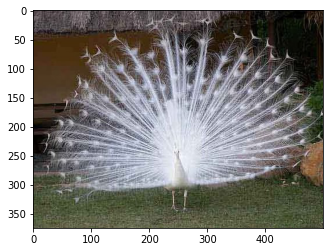

In [ ]:
def img2arr_fromURLs(url_list, resize = False):
  img_list = []
  for i in url_list:
    response = requests.get(i)
    img = Image.open(BytesIO(response.content))
    img = np.array(img)
    img_list.append(img)
  return img_list 
  '''
  請完成這個 Function
    Args
        - url_list: list of URLs
        - resize: bool
    Return
        - list of array
  '''
 
  #return img_list
result = img2arr_fromURLs(df[0:4][1].values)
# 原來... 每次都是第五張照片讀不到，就哭哭了
type(result)
import matplotlib.pyplot as plt
plt.imshow(result[3])

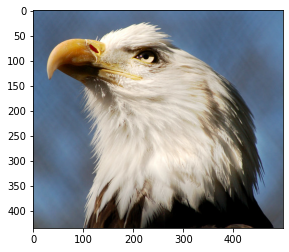

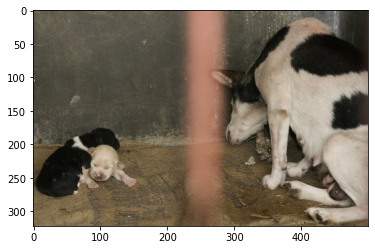

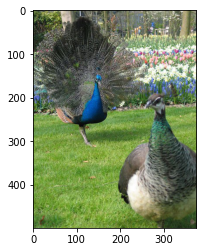

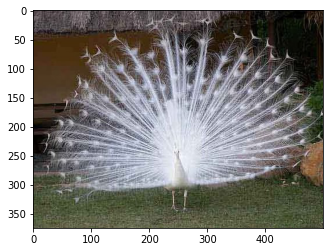

In [ ]:
def img2arr_fromURLs(url_list, resize = False):
  img_list = []
  for i in url_list:
    try: 
      response = requests.get(i)
      img = Image.open(BytesIO(response.content))
      img = np.array(img)
      img_list.append(img)
    except: 
      pass
  return img_list 
  '''
  請完成這個 Function
    Args
        - url_list: list of URLs
        - resize: bool
    Return
        - list of array
  '''
 
  #return img_list
result = img2arr_fromURLs(df[0:7][1].values)
# 原來... 每次都是第五張照片讀不到，就哭哭了
type(result)
import matplotlib.pyplot as plt
#plt.imshow(result[4]) # <==  這樣還是有些狀況，因為第五第六都有問題... 所以...
for i in result:
  plt.imshow(i)
  plt.show()